### Step 1: Mount the Google Drive

Remember to use GPU runtime before mounting your account. (Runtime --> Change runtime type).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 2: Open the project directory

Replace `Your_Dir` with your own path.

In [ ]:
cd /content/drive/MyDrive/UCLA Winter 2025/ECE C247 Final Project/emg2qwerty-main

/content/drive/MyDrive/UCLA Winter 2025/ECE C247 Final Project/emg2qwerty-main


### Step 3: Install required packages

After installing them, Colab will require you to restart the session.

In [ ]:
!pip install -r requirements.txt

  Cloning https://github.com/stepanhruda/camel-kenlm.git (to revision a6e906b2b30497dd999cb9c84c42c5111f8616e0) to /tmp/pip-req-build-vzxalpdg
  Running command git clone --filter=blob:none --quiet https://github.com/stepanhruda/camel-kenlm.git /tmp/pip-req-build-vzxalpdg
  Running command git rev-parse -q --verify 'sha^a6e906b2b30497dd999cb9c84c42c5111f8616e0'
  Running command git fetch -q https://github.com/stepanhruda/camel-kenlm.git a6e906b2b30497dd999cb9c84c42c5111f8616e0
  Running command git checkout -q a6e906b2b30497dd999cb9c84c42c5111f8616e0
  Resolved https://github.com/stepanhruda/camel-kenlm.git to commit a6e906b2b30497dd999cb9c84c42c5111f8616e0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


### Step 4: Start your experiments!

- Remember to download the dataset here: `Your_Dir/emg2qwerty-main/data`.
- You may now start your experiments with any scripts.
- Below is an example of single-user training.

In [ ]:
## TRAIN
!python -m emg2qwerty.train \
  user="single_user" \
  trainer.accelerator=gpu trainer.devices=1 trainer.max_epochs=30

2025-02-25 07:55:18.631734: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740470118.971973    3657 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740470119.063951    3657 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-25 07:55:19.782493: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[2025-02-25 07:55:43,810][__main__][INFO] - 
Config:
user: single_user
dataset:
  train:
  - user: 89335547
    sessi

In [ ]:
## TRAIN
!python -m emg2qwerty.train \
  user="single_user" \
  trainer.accelerator=gpu trainer.devices=1 trainer.max_epochs=2

2025-02-26 09:04:18.629040: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740560658.654354    6274 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740560658.661146    6274 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-26 09:04:18.684292: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[2025-02-26 09:04:24,985][__main__][INFO] - 
Config:
user: single_user
dataset:
  train:
  - user: 89335547
    sessi

In [ ]:
import yaml
from pathlib import Path
import matplotlib.pyplot as plt
import h5py # Assuming your EMG data is in HDF5 files.
import numpy as np

def load_yaml_config(filepath):
    with open(filepath, 'r') as file:
        config = yaml.safe_load(file)
    return config



config = load_yaml_config(r"/Users/emilytang/Library/CloudStorage/GoogleDrive-etangs@g.ucla.edu/My Drive/UCLA Winter 2025/ECE C247 Final Project/emg2qwerty-main/config/user/single_user.yaml")

train_sessions = [item['session'] for item in config['dataset']['train']]

val_sessions = [item['session'] for item in config['dataset']['val']]
test_sessions = [item['session'] for item in config['dataset']['test']]

['2021-06-03-1622765527-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', '2021-06-02-1622681518-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', '2021-06-04-1622863166-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', '2021-07-22-1627003020-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', '2021-07-21-1626916256-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', '2021-07-22-1627004019-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', '2021-06-05-1622885888-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', '2021-06-02-1622679967-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', '2021-06-03-1622764398-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', '2021-07-21-1626917264-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', '2021-06-05-1622889105-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', '2021-06-

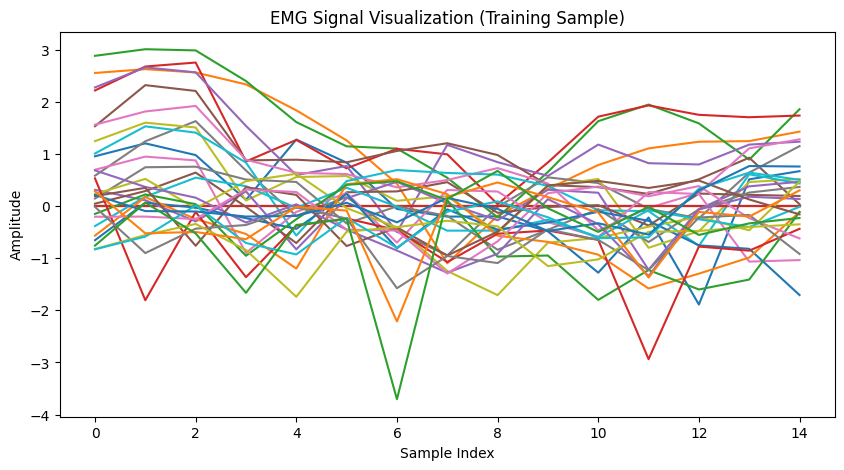

In [ ]:
import pytorch_lightning as pl
from emg2qwerty.lightning import *
from emg2qwerty.transforms import Compose, ToTensor, ForEach, RandomBandRotation, TemporalAlignmentJitter, LogSpectrogram, SpecAugment
import numpy

import os
os.chdir(r"/Users/emilytang/Library/CloudStorage/GoogleDrive-etangs@g.ucla.edu/My Drive/UCLA Winter 2025/ECE C247 Final Project/emg2qwerty-main/data")
files = os.listdir()
print(files)

train_sessions = files[:-2]
val_sessions = [files[-2]]
test_sessions = [files[-1]]


print("Train Sessions:", train_sessions)
print("Validation Sessions:", val_sessions)
print("Test Sessions:", test_sessions)



# Instantiate the data module
data_module = WindowedEMGDataModule(
    window_length=200,
    padding=(50, 50),
    batch_size=32,
    num_workers=2,
    train_sessions=train_sessions,
    val_sessions=val_sessions,
    test_sessions=test_sessions,

    train_transform=Compose([
        ToTensor(fields=["emg_left", "emg_right"]),
        ForEach(RandomBandRotation(offsets=[-1, 0, 1])),
        TemporalAlignmentJitter(max_offset=10),
        LogSpectrogram(n_fft=64, hop_length=16),
        SpecAugment(n_time_masks=2, time_mask_param=10, n_freq_masks=2, freq_mask_param=10)
    ]),

    val_transform=Compose([
        ToTensor(fields=["emg_left", "emg_right"]),
        LogSpectrogram(n_fft=64, hop_length=16)
    ]),

    test_transform=Compose([
        ToTensor(fields=["emg_left", "emg_right"]),
        LogSpectrogram(n_fft=64, hop_length=16)
    ]),
)

data_module.setup()

# Visualize a sample from the training dataset
sample = data_module.train_dataset[0]
# emg_signal = sample.numpy()

if isinstance(sample, tuple):
    emg_tensor = sample[0]  # Assuming the tensor is the first element
    emg_signal = emg_tensor.numpy()
else:
    emg_signal = sample.numpy()

plt.figure(figsize=(10, 5))
plt.plot(emg_signal[:, 0, 0])
plt.title("EMG Signal Visualization (Training Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

/var/folders/lq/hljvqqj93675c080zfghw1jc0000gn/T/ipykernel_12153/3632821419.py:10: UserWarning: nperseg = 256 is greater than input length  = 33, using nperseg = 33
  f, t, Sxx = signal.spectrogram(emg_channel, fs)


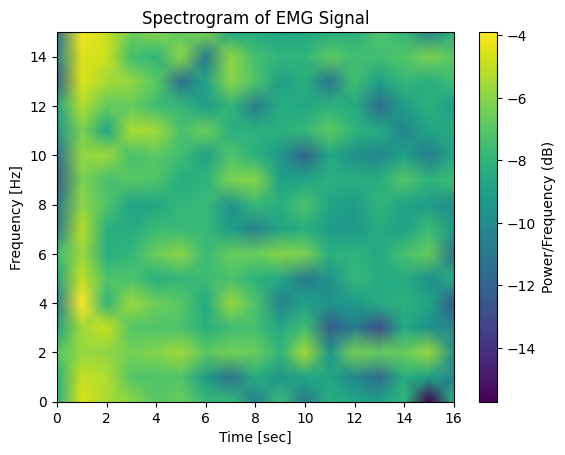

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# Assuming emg_signal is your numpy array with shape (num_samples, num_channels)
emg_channel = emg_signal[:, 0]  # Select the first channel

fs = 1000  # Replace with your actual sampling rate

f, t, Sxx = signal.spectrogram(emg_channel, fs)

import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# Assuming C is your spectrogram data with shape (15, 16, 17, 1)
spectrogram_data = Sxx[0, :, :, 0]  # Select the first sample and channel

# Assuming f and t are the frequency and time arrays from scipy.signal.spectrogram
# If not, create them based on the shape of your spectrogram_data
# Example:
f = np.arange(spectrogram_data.shape[0])  # Frequency axis
t = np.arange(spectrogram_data.shape[1])  # Time axis

plt.pcolormesh(t, f, np.log(spectrogram_data), shading='gouraud')  # Convert to dB
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of EMG Signal')
plt.colorbar(label='Power/Frequency (dB)')
plt.show()

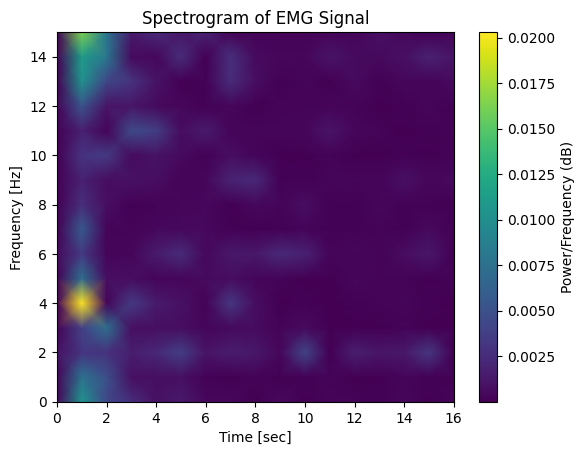

In [ ]:
plt.pcolormesh(t, f, (spectrogram_data), shading='gouraud')  # Convert to dB
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of EMG Signal')
plt.colorbar(label='Power/Frequency (dB)')
plt.show()